This program implements the histogram matching algorithm that loads the source image(lena.bmp) for matching its histogram to the one of target image(license_plate.bmp).

programmer: Shih-Shinh Huang

date:: 2021.10.19

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import google.colab.patches as colab
import cv2
import numpy
import matplotlib.pyplot as plt

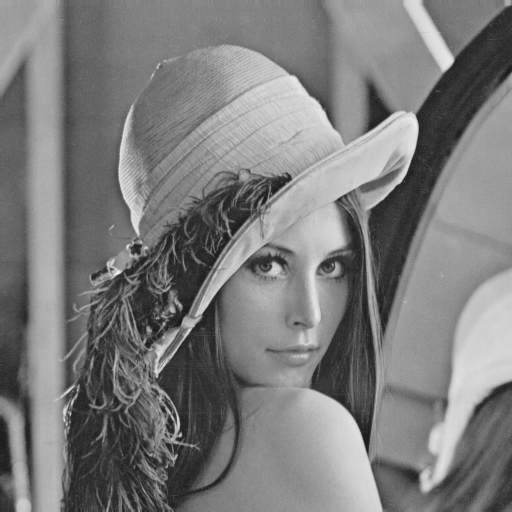

In [10]:
source_mat = cv2.imread("/content/drive/MyDrive/Colab Notebooks/histogram matching/lena.bmp", 0)
colab.cv2_imshow(source_mat)

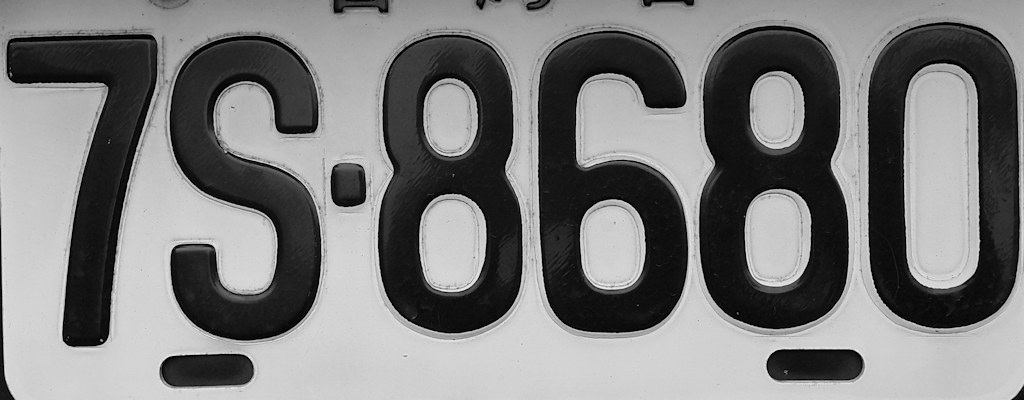

In [11]:
target_mat = cv2.imread("/content/drive/MyDrive/Colab Notebooks//histogram matching/license_plate.bmp", 0)
colab.cv2_imshow(target_mat)

In [12]:
source_hist = numpy.zeros((256), dtype=float)

rows = source_mat.shape[0]
cols = source_mat.shape[1]

for r in range(rows):
  for c in range(cols):
    gray_value = source_mat[r, c]
    source_hist[gray_value] = source_hist[gray_value] + 1

for i in range(256):
  source_hist[i] = source_hist[i] / (rows * cols)

<BarContainer object of 256 artists>

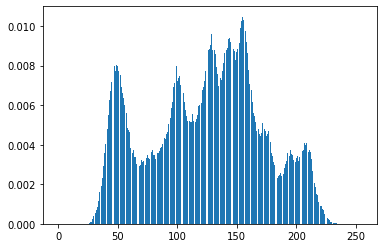

In [13]:
plt.bar(range(source_hist.shape[0]), source_hist)

In [14]:
# T: transformation function
T = numpy.zeros((256), dtype=int)

# acc_pr: the accumulated probability of the input histogram
acc_pr = 0.0;

for x in range(256):
  acc_pr = acc_pr + source_hist[x]
  T[x] = int(255.0 * acc_pr)

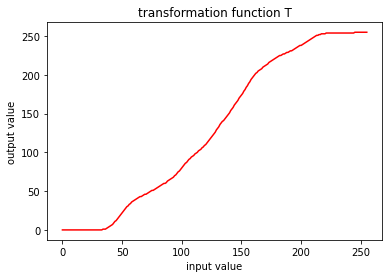

In [15]:
plt.title('transformation function T')
plt.xlabel('input value')
plt.ylabel('output value')
plt.plot(range(T.shape[0]), T, 'red')
plt.show()

In [16]:
target_hist = numpy.zeros((256), dtype=float)

rows = target_mat.shape[0]
cols = target_mat.shape[1]

for r in range(rows):
  for c in range(cols):
    gray_value = target_mat[r, c]
    target_hist[gray_value] = target_hist[gray_value] + 1

for i in range(256):
  target_hist[i] = target_hist[i] / (rows * cols)

<BarContainer object of 256 artists>

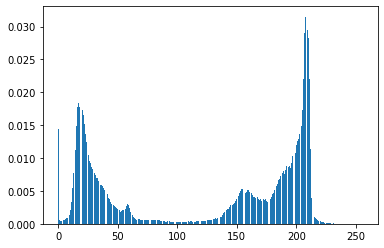

In [17]:
plt.bar(range(target_hist.shape[0]), target_hist)

In [18]:
# G: transformation function
G = numpy.zeros((256), dtype=int)

# acc_pr: the accumulated probability of the input histogram
acc_pr = 0.0;

for x in range(256):
  acc_pr = acc_pr + target_hist[x]
  G[x] = int(255.0 * acc_pr)

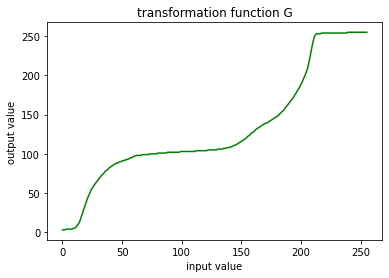

In [19]:
plt.title('transformation function G')
plt.xlabel('input value')
plt.ylabel('output value')
plt.plot(range(G.shape[0]), G, 'green')
plt.show()

In [20]:
G_inv = numpy.zeros((256), dtype=int)

for y in range(256):

  # initially assume that the mapping of inverse does not exist
  G_inv[y] = -1

  # find the x that outputs y, that is, y = G(x)
  for x in range(256):

    # find the mapping of G_inv[y]
    if G[x] == y:
      G_inv[y] = x

      # make the x is the smallest one
      break;

In [21]:
for y in range(256):

  # check if no mapping exists
  if G_inv[y] == -1:

    for offset in range(256):
      # check if the mapping at y - offset exists
      if y - offset >=0 and G_inv[y - offset] != -1:
        G_inv[y] = G_inv[y - offset]
        break;

      # check if the mapping at y + offset exists
      if y + offset < 255 and G_inv[y + offset] != -1:
        G_inv[y] = G_inv[y + offset]
        break;

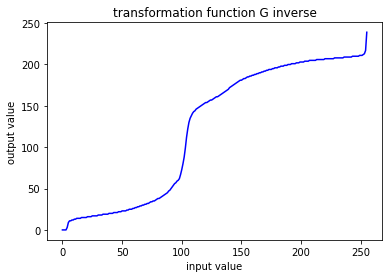

In [22]:
plt.title('transformation function G inverse')
plt.xlabel('input value')
plt.ylabel('output value')
plt.plot(range(G_inv.shape[0]), G_inv, 'blue')
plt.show()

In [23]:
Z = numpy.zeros((256), dtype=int)

for x in range(256):
  y = T[x]
  Z[x]  = G_inv[y]

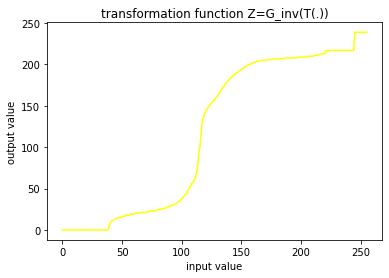

In [24]:
plt.title('transformation function Z=G_inv(T(.))')
plt.xlabel('input value')
plt.ylabel('output value')
plt.plot(range(Z.shape[0]), Z, 'yellow')
plt.show()

In [25]:
# create an output image
out_mat = numpy.zeros(source_mat.shape, dtype=numpy.uint8)

rows = source_mat.shape[0]
cols = source_mat.shape[1]

for r in range(rows):
  for c in range(cols):
    gray_value = source_mat[r, c]
    out_value = Z[gray_value]
    out_mat[r, c] = out_value

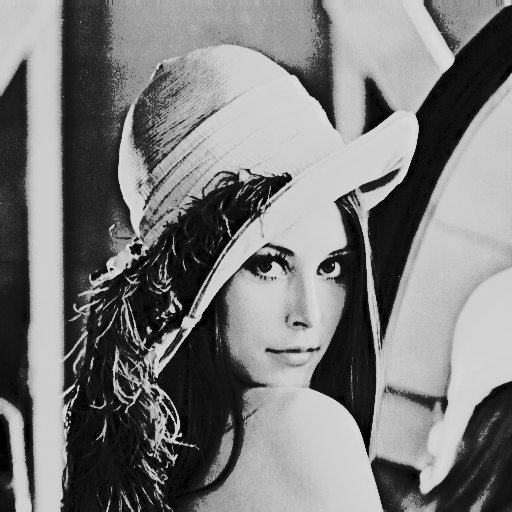

In [26]:
colab.cv2_imshow(out_mat)

In [27]:
out_hist = numpy.zeros((256), dtype=float)

for r in range(rows):
  for c in range(cols):
    gray_value = out_mat[r, c]
    out_hist[gray_value] = out_hist[gray_value] + 1

for i in range(256):
  out_hist[i] = out_hist[i] / (rows * cols)

<BarContainer object of 256 artists>

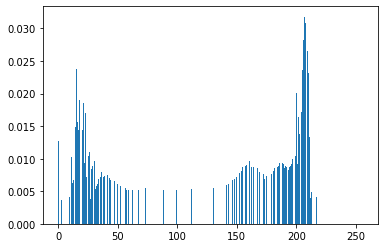

In [28]:
plt.bar(range(out_hist.shape[0]), out_hist)